In [1]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.linear_model import LinearRegression as lrs 

In [2]:
# Import duckdb to use SQL query
import duckdb as dkb

In [3]:
# Load the data csv file
data = pd.read_csv(r"survey_results_public.csv")
data.head(5)

C:\Users\huysi\AppData\Local\Temp\ipykernel_7428\691958225.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"survey_results_public.csv")


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [4]:
# Query Number of Responses by Age with Duckdb
query1 = """
    select REPLACE(REPLACE(Age, ' years old', ''), '65 years or older', ' >=65') AS Age, count(ResponseID) as 'Number of Responses'
    from data
    where Age != 'Prefer not to say'
    group by Age
    order by Age desc
        """

con = dkb.connect()
result1 = con.sql(query1).df()
result1

,Age,Number of Responses
0,55-64,2626
1,45-54,6265
2,35-44,13232
3,25-34,16485
4,18-24,9195
5,>=65,942


In [5]:
# Add labels to attributes
labels = result1['Age']
size = result1['Number of Responses']

In [6]:
text_properties = {
    'fontsize': 16,      # Increase font size
    'fontweight': 'semi-bold' # Set font weight
}

# Customize wedge (slice) properties (for borders)
wedge_properties = {
    'linewidth': 0.4,        # Set border width
    'edgecolor': 'black' # Set border color
}

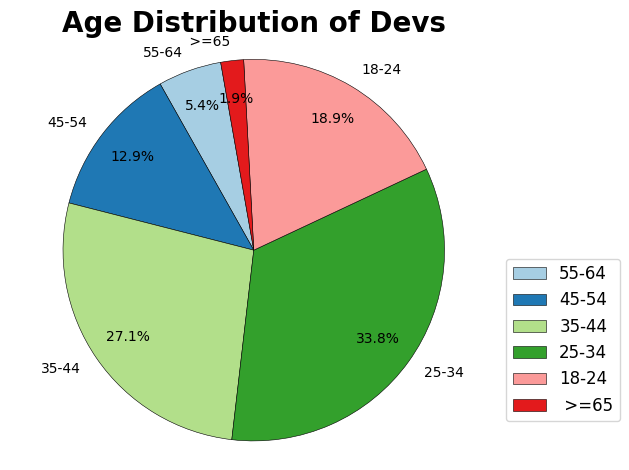

In [7]:
plt.Figure(figsize=(10,8))
plt.pie(size, labels=labels, 
        autopct='%1.1f%%',
        pctdistance=0.8, 
        startangle=100, 
        colors=plt.cm.Paired.colors,
        wedgeprops=wedge_properties)
plt.axis('equal')
plt.title('Age Distribution of Devs', fontsize = 20, fontweight = 'bold')
plt.legend(loc ='best',
           bbox_to_anchor=(1, 0.5), 
           fontsize='large')
plt.tight_layout()
plt.show()

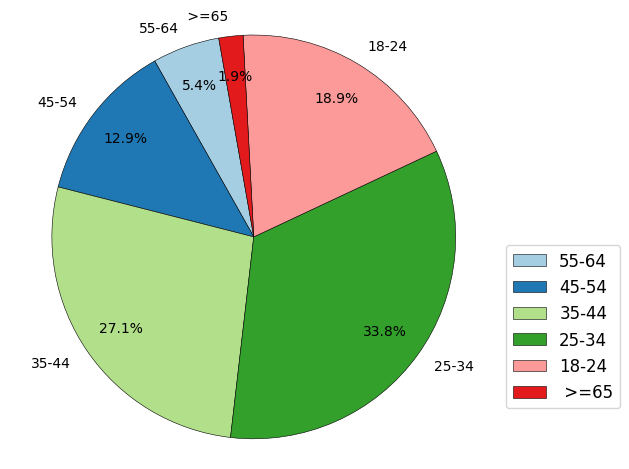

In [8]:
plt.Figure(figsize=(10,8))
plt.pie(size, labels=labels, 
        autopct='%1.1f%%',
        pctdistance=0.8, 
        startangle=100, 
        colors=plt.cm.Paired.colors,
        wedgeprops=wedge_properties)
plt.axis('equal')
plt.legend(loc ='best',
           bbox_to_anchor=(1, 0.5), 
           fontsize='large')
plt.tight_layout()
plt.show()

In [9]:
query2 = """
    select REPLACE(REPLACE(Age, ' years old', ''), '65 years or older', ' Over 65') AS Age, avg(WorkExp) as 'Avg. Years of Exp'
    from data
    where Age != 'Prefer not to say'
    group by age
    order by avg(workexp)
"""
result2 = con.sql(query2).df()
display(result2)

,Age,Avg. Years of Exp
0,18-24,2.939725
1,25-34,6.922944
2,35-44,14.697449
3,45-54,23.850101
4,55-64,32.803214
5,Over 65,41.370288


In [10]:
demoq = """
    select edlevel, count(edlevel)
    from data
    group by edlevel
"""
re_demo = con.sql(demoq).df()
re_demo

,EdLevel,count(edlevel)
0,"Associate degree (A.A., A.S., etc.)",1560
1,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2620
2,None,0
3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20247
4,Primary/elementary school,582
5,Some college/university study without earning ...,6175
6,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",12575
7,"Secondary school (e.g. American high school, G...",3627
8,Other (please specify):,701


In [11]:
con.execute("""DROP TABLE IF EXISTS data_clean;""")
con.execute("""
    CREATE TABLE data_clean AS
SELECT
    CASE
        WHEN LOWER(TRIM(edlevel)) LIKE '%associate%' THEN 'Associate''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%professional%' THEN 'Professional''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%master%' THEN 'Master''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%bachelor%' THEN 'Bachelor''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%secondary%' THEN 'Secondary school'
        WHEN LOWER(TRIM(edlevel)) LIKE '%other%' THEN 'Other'
        WHEN LOWER(TRIM(edlevel)) LIKE '%some%' THEN 'Some college without earning a degree'
        ELSE TRIM(edlevel)
    END AS edlevel,
    responseid
FROM data
""")
result3 = con.sql("""
    SELECT edlevel as 'Education', 
                  COUNT(responseid) * 100.0 / (SELECT COUNT(responseid) FROM data_clean WHERE edlevel != 'NA') AS 'Percentage of Responses'  
    FROM data_clean
    WHERE edlevel != 'NA'
    GROUP BY edlevel
    ORDER BY edlevel ASC
""").df()

res_sorted = result3.sort_values(by='Percentage of Responses', ascending = True)
res_sorted

,Education,Percentage of Responses
4,Primary/elementary school,1.210306
3,Other,1.457774
0,Associate's degree,3.244120
5,Professional's degree,5.448458
6,Secondary school,7.542579
7,Some college without earning a degree,12.841308
2,Master's degree,26.150519
1,Bachelor's degree,42.104935


In [12]:
x = res_sorted['Percentage of Responses']
y = res_sorted['Education']

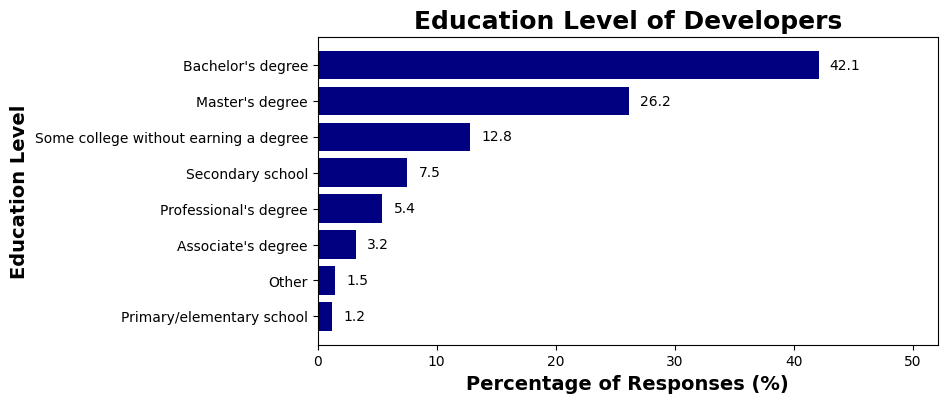

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
bars = plt.barh(y, x, color = 'navy')

ax.bar_label(bars, padding = 8, fmt='%.1f')

ax.set_xlabel('Percentage of Responses (%)', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Education Level', fontsize = 14, fontweight = 'bold')
ax.set_title("Education Level of Developers", fontsize = 18, fontweight = 'bold')

ax.set_xlim(right=res_sorted['Percentage of Responses'].max() + 10)

plt.show()

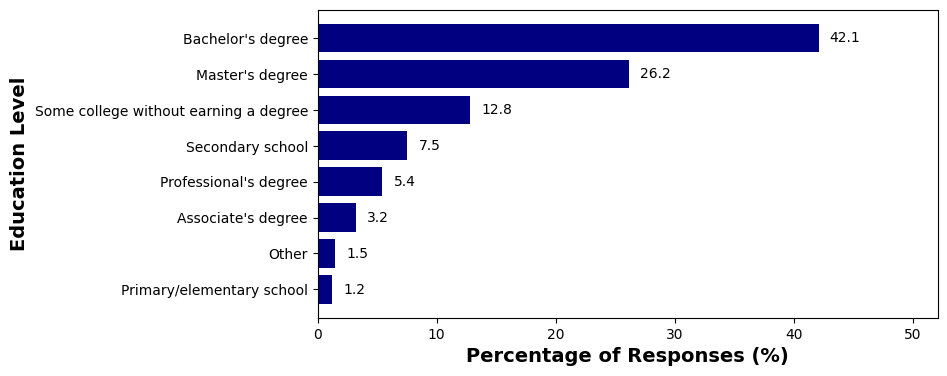

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
bars = plt.barh(y, x, color = 'navy')

ax.bar_label(bars, padding = 8, fmt='%.1f')

ax.set_xlabel('Percentage of Responses (%)', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Education Level', fontsize = 14, fontweight = 'bold')

ax.set_xlim(right=res_sorted['Percentage of Responses'].max() + 10)

plt.show()

In [ ]:
queryAI = """
    select aiselect, aicomplex, aiacc, aisent
    from data
    where aiselect is not null
    and aicomplex is not null
    and aiacc is not null
    and aisent is not null
"""
resultAI = con.sql(queryAI).df()
resultAI

,AISelect,AIComplex,AIAcc,AISent
0,"Yes, I use AI tools monthly or infrequently",Bad at handling complex tasks,Neither trust nor distrust,Indifferent
1,"Yes, I use AI tools weekly",Bad at handling complex tasks,Neither trust nor distrust,Indifferent
2,"Yes, I use AI tools daily",Neither good or bad at handling complex tasks,Somewhat trust,Favorable
3,"Yes, I use AI tools weekly",Bad at handling complex tasks,Somewhat trust,Favorable
4,"Yes, I use AI tools weekly","Good, but not great at handling complex tasks",Neither trust nor distrust,Favorable
...,...,...,...,...
33096,"Yes, I use AI tools monthly or infrequently",Neither good or bad at handling complex tasks,Somewhat trust,Favorable
33097,"Yes, I use AI tools daily",Very well at handling complex tasks,Highly trust,Very favorable
33098,"Yes, I use AI tools weekly","Good, but not great at handling complex tasks",Somewhat distrust,Favorable
33099,"Yes, I use AI tools daily",Neither good or bad at handling complex tasks,Somewhat distrust,Very favorable


In [22]:
resultAI.to_csv("ai_use.csv")